# DAV Assignment

Preprocess Dataset:

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor


df = pd.read_csv('pirvision_office_dataset1.csv')

In [148]:
missing_values = df.isnull().sum()
print(missing_values)

Date             0
Time             0
Label            0
Temperature_F    0
PIR_1            0
PIR_2            0
PIR_3            0
PIR_4            0
PIR_5            0
PIR_6            0
PIR_7            0
PIR_8            0
PIR_9            0
PIR_10           0
PIR_11           0
PIR_12           0
PIR_13           0
PIR_14           0
PIR_15           0
PIR_16           0
PIR_17           0
PIR_18           0
PIR_19           0
PIR_20           0
PIR_21           0
PIR_22           0
PIR_23           0
PIR_24           0
PIR_25           0
PIR_26           0
PIR_27           0
PIR_28           0
PIR_29           0
PIR_30           0
PIR_31           0
PIR_32           0
PIR_33           0
PIR_34           0
PIR_35           0
PIR_36           0
PIR_37           0
PIR_38           0
PIR_39           0
PIR_40           0
PIR_41           0
PIR_42           0
PIR_43           0
PIR_44           0
PIR_45           0
PIR_46           0
PIR_47           0
PIR_48           0
PIR_49      

In [131]:
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


In [158]:
# Function to remove outliers based on IQR method
def remove_outliers(df):
    # Select numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Iterate through numeric columns to remove outliers
    for column in numeric_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds to filter the outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers: filter the dataframe based on the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Apply the function to your dataset
df_n = remove_outliers(df)

# Check the shape before and after removing outliers to verify
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_n.shape}")

Original dataset shape: (7651, 59)
Dataset shape after removing outliers: (5451, 59)


### Plot Heat Map

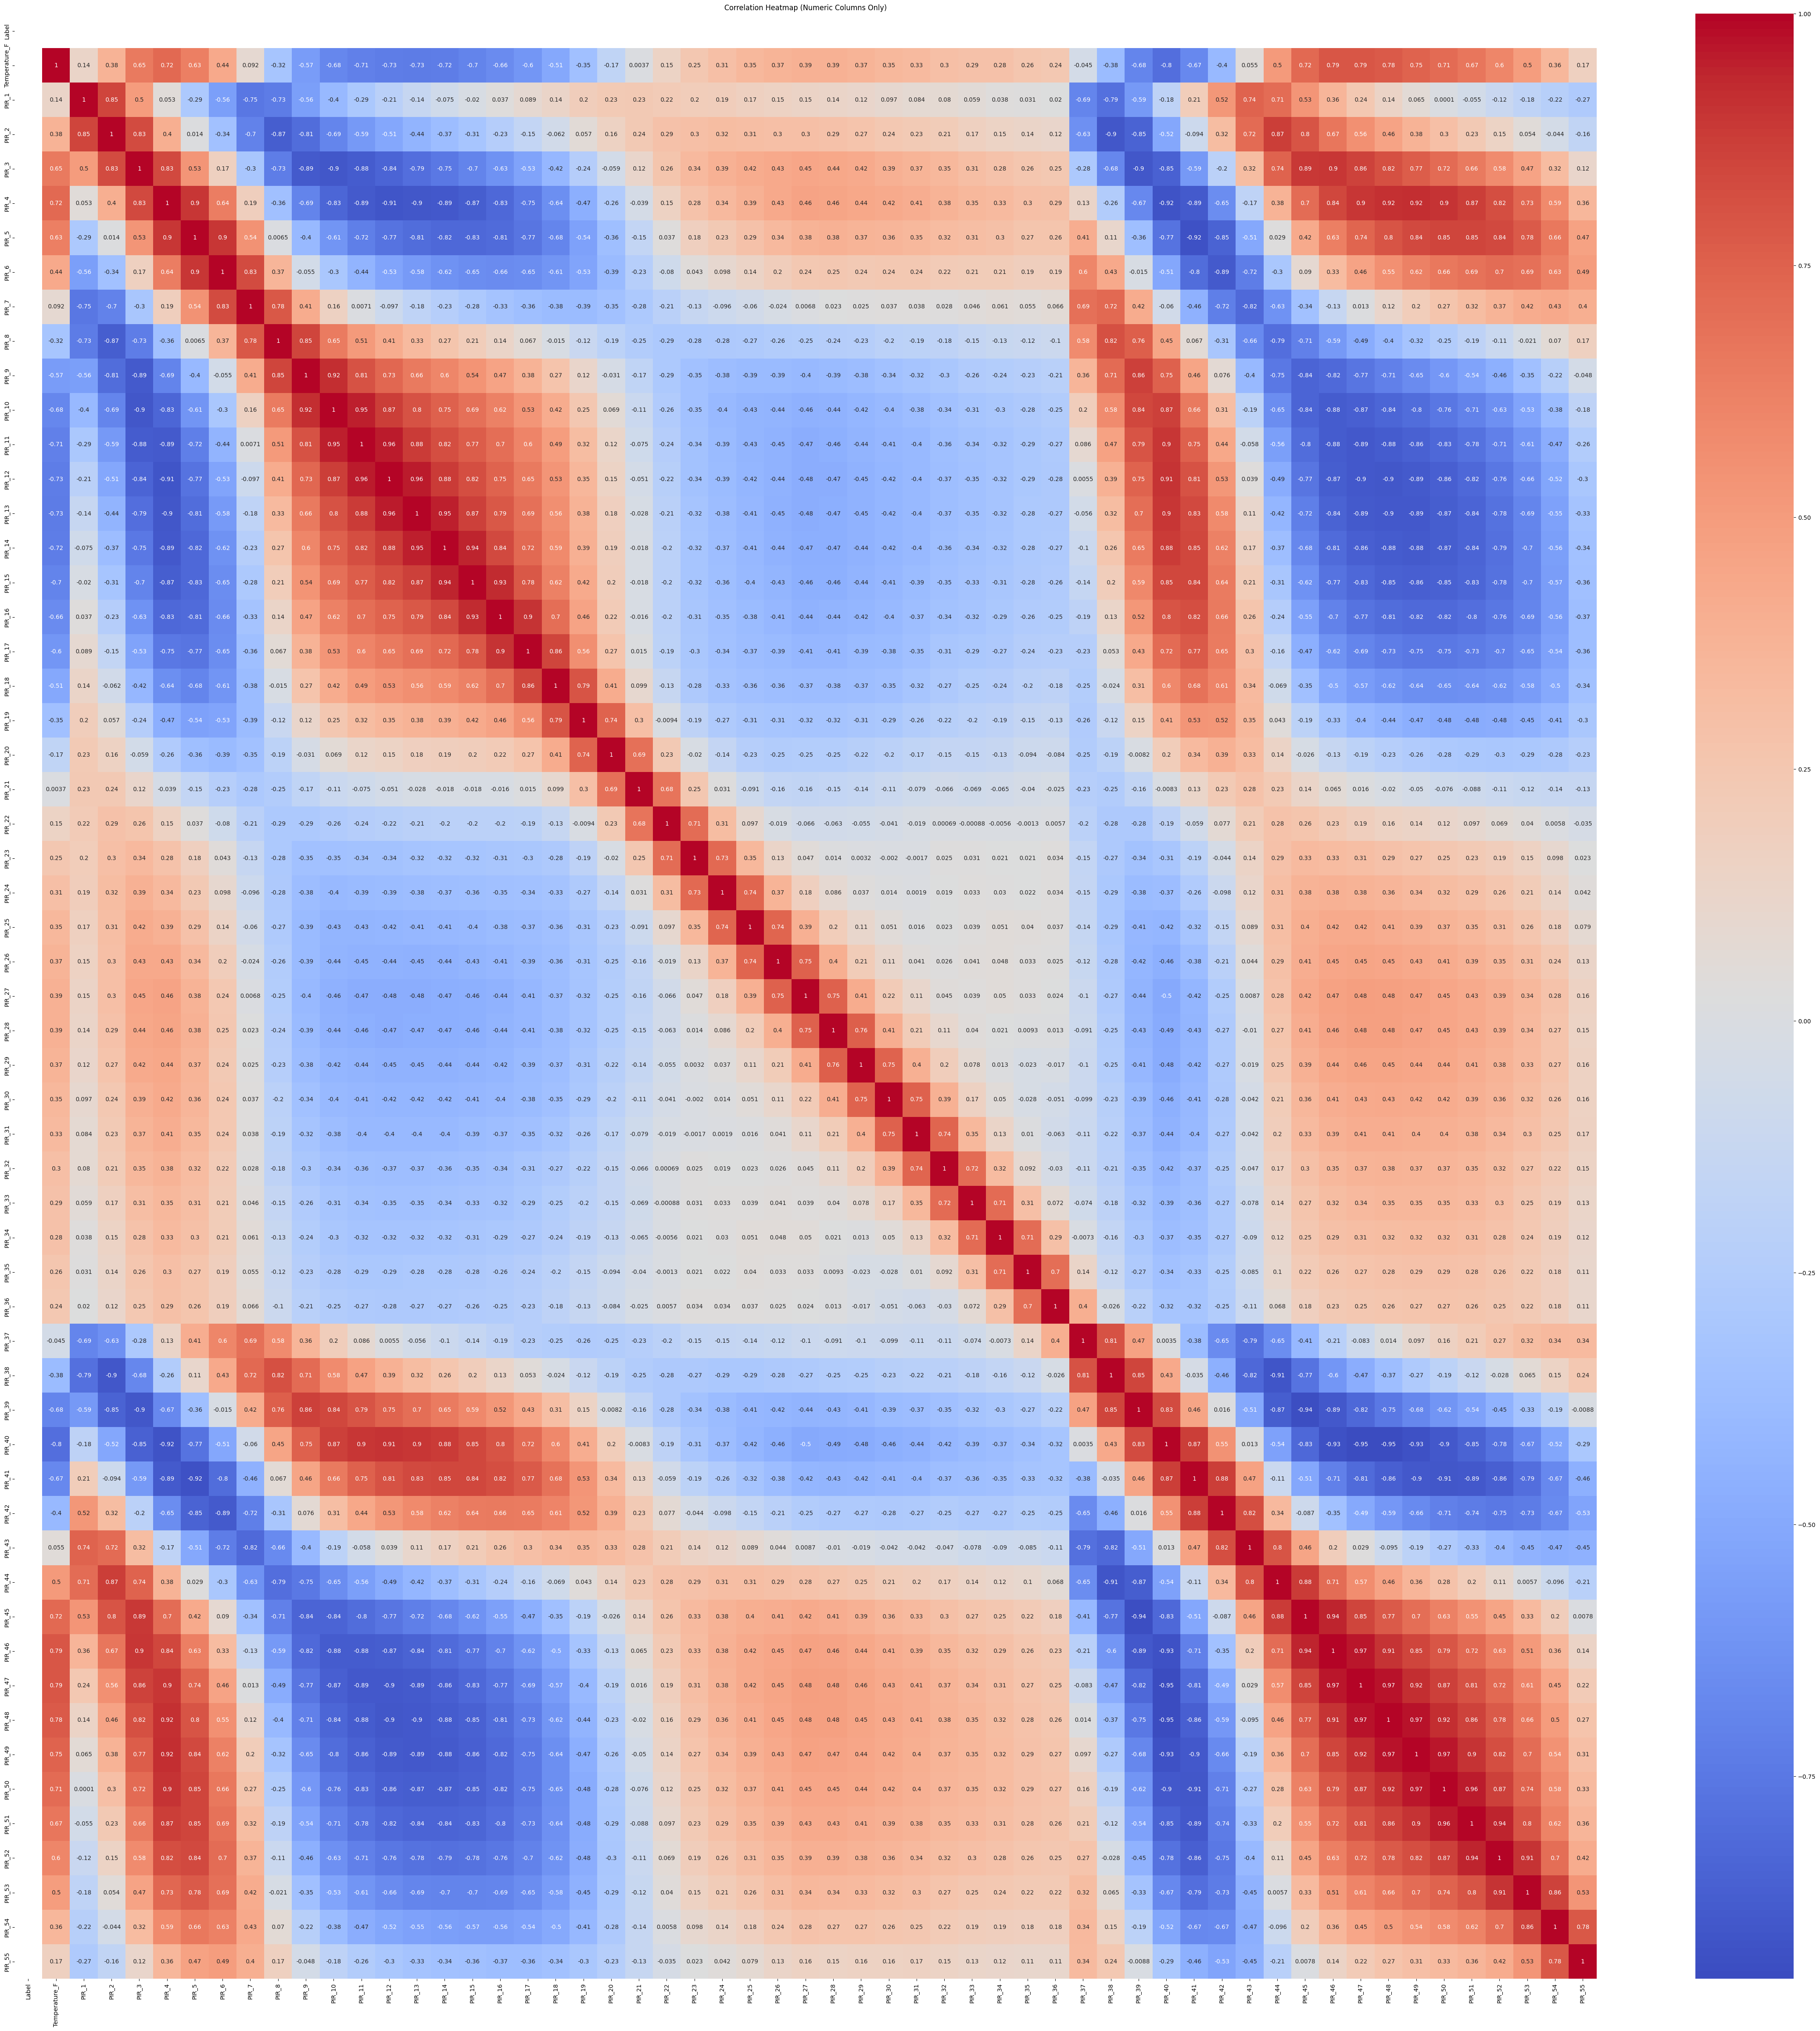

In [159]:
numeric_df = df_n.select_dtypes(include=['number'])

# Now safely plot the heatmap
plt.figure(figsize=(60,60))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


## split data into 70 and 30 %
Target Variable: Temperature_F

In [180]:
# Select features (all PIR sensors)
features = [f'PIR_{i}' for i in range(1, 56)]
X = df_n[features]

# Target variable
y = df_n['Temperature_F']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3815, 55)
Testing set shape: (1636, 55)


### Linear Regression (Multivariable)
Values of MAE and r2

In [181]:

model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MAE: {mae}")
print(f"Linear Regression R² Score: {r2}")

Linear Regression MAE: 0.555383360968188
Linear Regression R² Score: 0.7160596819460242


## Plot Linear Regression

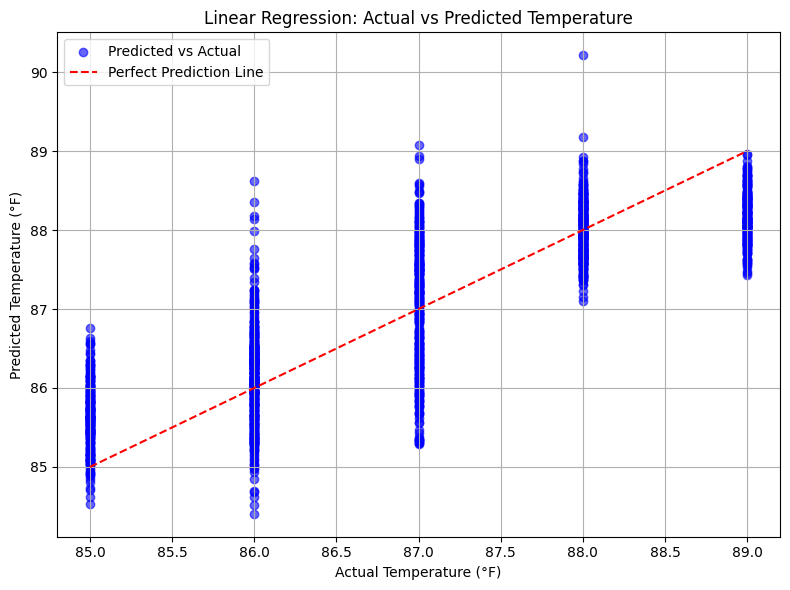

In [163]:
#Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Actual Temperature (°F)')
plt.ylabel('Predicted Temperature (°F)')
plt.title('Linear Regression: Actual vs Predicted Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### KDE Plot for Linear Regression (Multivariable)

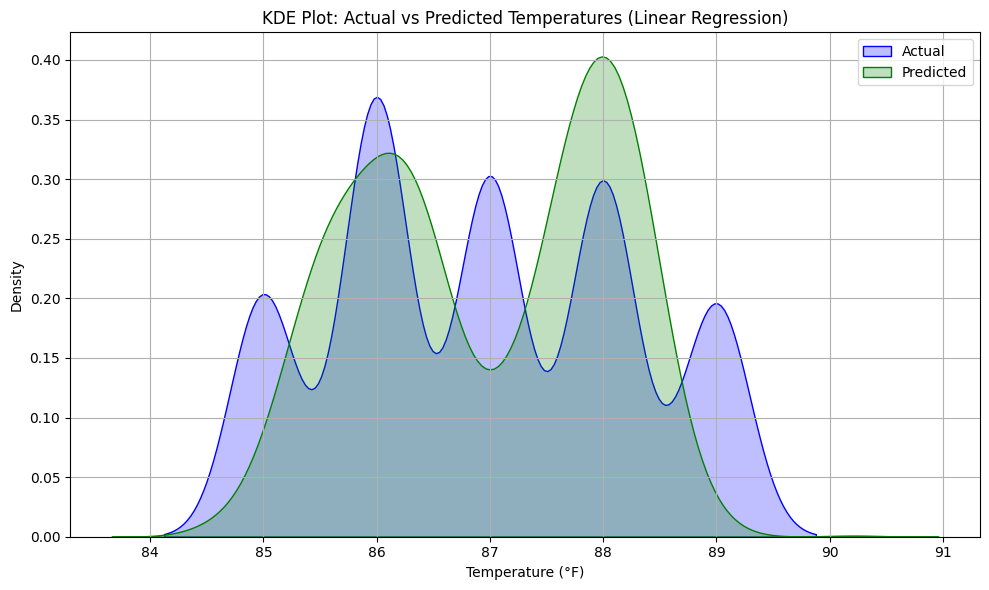

In [164]:
results_df = pd.DataFrame({
    'Actual Temperature': y_test,
    'Predicted Temperature': y_pred
})

# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=results_df, x='Actual Temperature', fill=True, label='Actual', color='blue')
sns.kdeplot(data=results_df, x='Predicted Temperature', fill=True, label='Predicted', color='green')

# Plot formatting
plt.title('KDE Plot: Actual vs Predicted Temperatures (Linear Regression)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Polynomial regression single variable
Train and test on single variable

Polynomial Regression (Degree 2) MAE: 0.6367813362588214
Polynomial Regression (Degree 2) R² Score: 0.6170394323721311


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


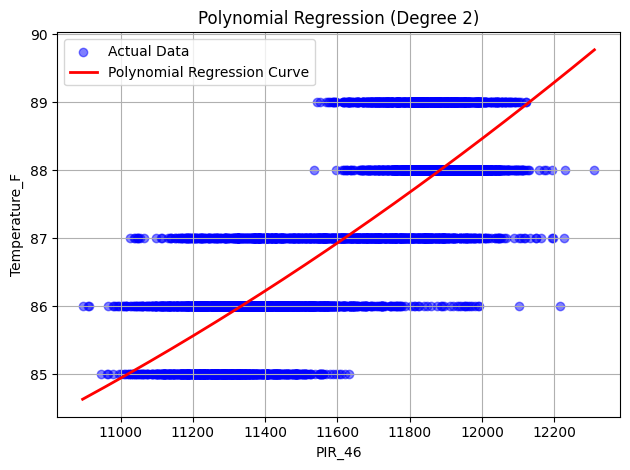

In [182]:
# Select single feature and target
x = df_n[['PIR_46']]
Y = df_n['Temperature_F']

# Train-test split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

# Transform to polynomial features (degree 2)
Poly = PolynomialFeatures(degree=2)
x_train_poly = Poly.fit_transform(x_train)
x_test_poly = Poly.transform(x_test)

# Train the model
model = LinearRegression()
model.fit(x_train_poly, Y_train)

# Predict on test set
Y_pred = model.predict(x_test_poly)

# Evaluate
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Polynomial Regression (Degree 2) MAE: {mae}")
print(f"Polynomial Regression (Degree 2) R² Score: {r2}")

# Scatter actual data points
plt.scatter(x, Y, color='blue', label='Actual Data', alpha=0.5)

# Generate a sequence of values for a smooth curve
x_range = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
x_range_poly = Poly.transform(x_range)
Y_range_pred = model.predict(x_range_poly)

# Plot the polynomial regression curve
plt.plot(x_range, Y_range_pred, color='red', linewidth=2, label='Polynomial Regression Curve')

# Labels and title
plt.xlabel('PIR_46')
plt.ylabel('Temperature_F')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


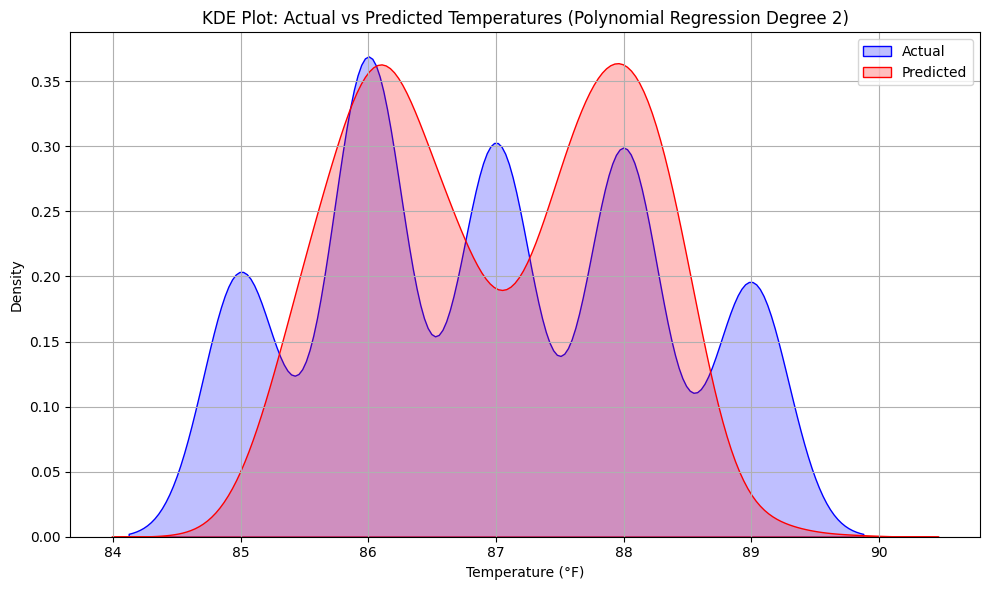

In [205]:
# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({
    'Actual Temperature': Y_test,
    'Predicted Temperature': Y_pred
})

# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=results_df, x='Actual Temperature', fill=True, label='Actual', color='blue')
sns.kdeplot(data=results_df, x='Predicted Temperature', fill=True, label='Predicted', color='red')

# Plot formatting
plt.title('KDE Plot: Actual vs Predicted Temperatures (Polynomial Regression Degree 2)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Polynomial multivariable

In [198]:
# Select multiple features and target
features = ['PIR_40', 'PIR_4', 'PIR_47', 'PIR_46', 'PIR_3']
X = df_n[features]
y = df_n['Temperature_F']

poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)


# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Multivariable Polynomial Regression MAE: {mae}")
print(f"Multivariable Polynomial Regression R² Score: {r2}")

Multivariable Polynomial Regression MAE: 0.555383360968188
Multivariable Polynomial Regression R² Score: 0.7160596819460242


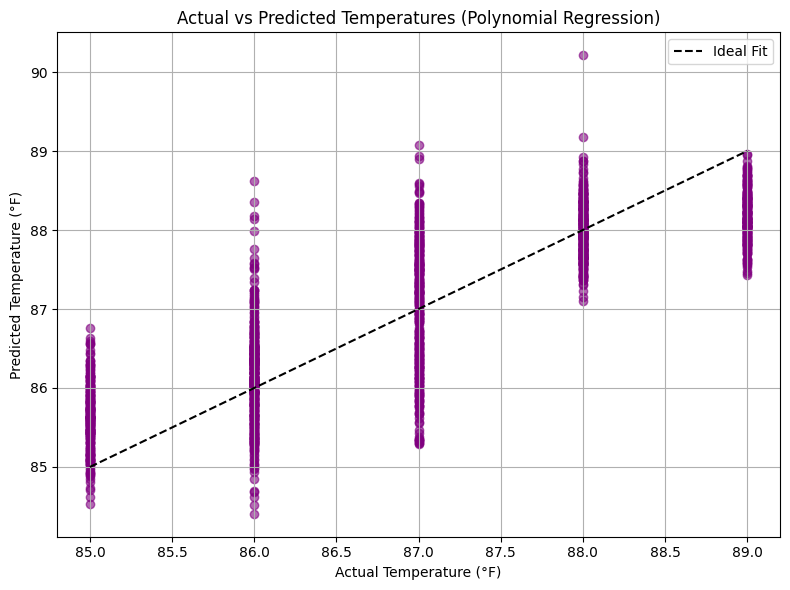

In [199]:
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Ideal Fit')

# Labels and title
plt.xlabel('Actual Temperature (°F)')
plt.ylabel('Predicted Temperature (°F)')
plt.title('Actual vs Predicted Temperatures (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

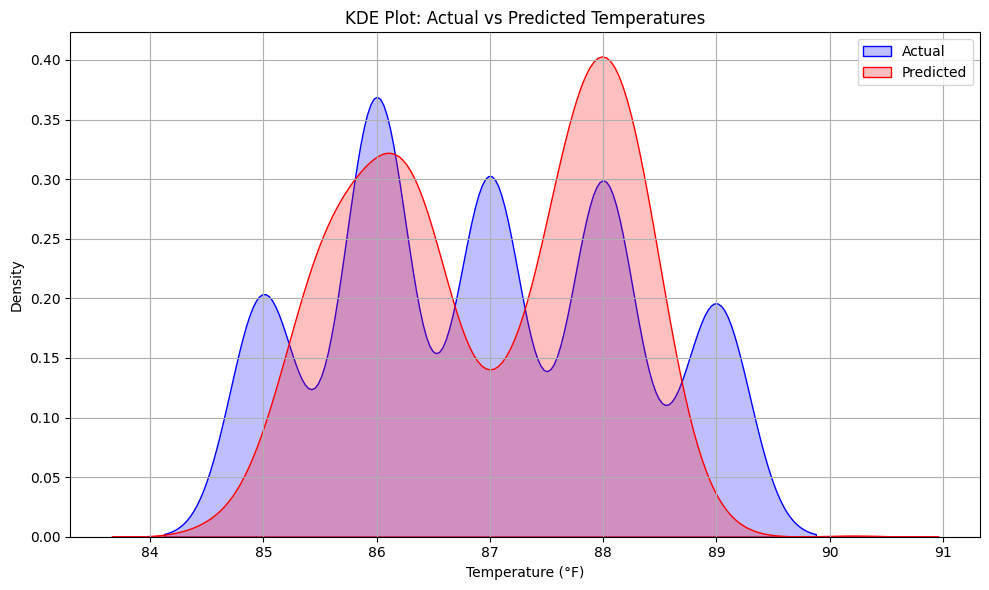

In [200]:
results_df = pd.DataFrame({
    'Actual Temperature': y_test,
    'Predicted Temperature': y_pred
})

# KDE Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=results_df, x='Actual Temperature', fill=True, label='Actual', color='blue')
sns.kdeplot(data=results_df, x='Predicted Temperature', fill=True, label='Predicted', color='red')

# Plot formatting
plt.title('KDE Plot: Actual vs Predicted Temperatures')
plt.xlabel('Temperature (°F)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Decision Tree Regressor

In [201]:
# Select features (all PIR sensors)
features = [f'PIR_{i}' for i in range(1, 56)]
X = df_n[features]

# Target variable
y = df_n['Temperature_F']

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)



# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Fit on training data
tree_model.fit(X_train, y_train)

# Predict on test data
y_tree_pred = tree_model.predict(X_test)


In [202]:

mae_tree = mean_absolute_error(y_test, y_tree_pred)
r2_tree = r2_score(y_test, y_tree_pred)

print(f"Decision Tree MAE: {mae_tree}")
print(f"Decision Tree R² Score: {r2_tree}")


Decision Tree MAE: 0.6558679706601467
Decision Tree R² Score: 0.44474090094398155


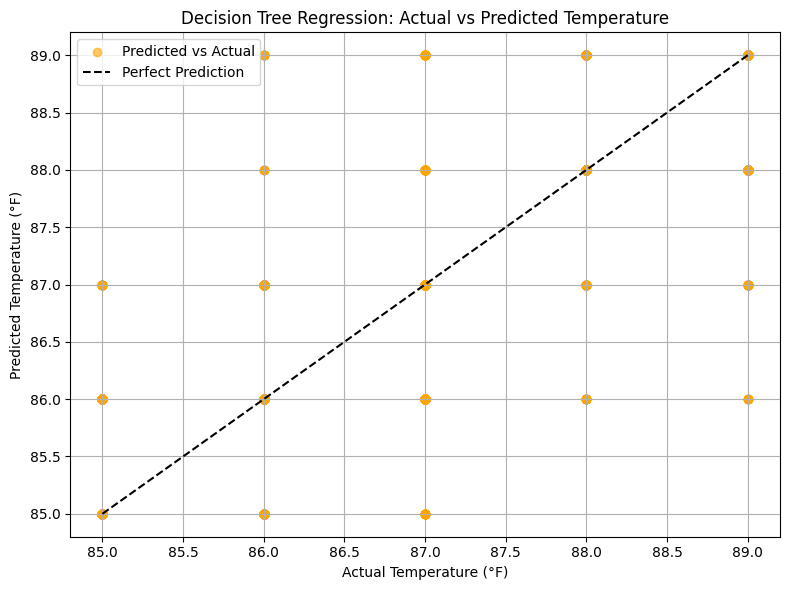

In [203]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_tree_pred, color='orange', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Temperature (°F)')
plt.ylabel('Predicted Temperature (°F)')
plt.title('Decision Tree Regression: Actual vs Predicted Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


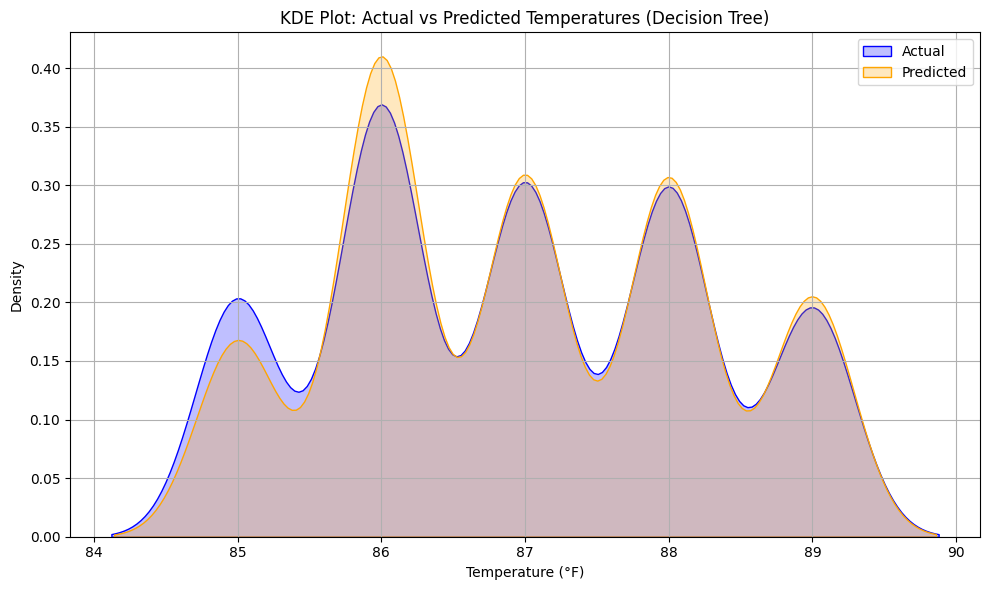

In [204]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=y_test, fill=True, label='Actual', color='blue')
sns.kdeplot(x=y_tree_pred, fill=True, label='Predicted', color='orange')

plt.title('KDE Plot: Actual vs Predicted Temperatures (Decision Tree)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
